<a href="https://colab.research.google.com/github/mzeleniy/MIT-futuremakers/blob/main/day_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gfdrive")
#import pandas and import google drive

Mounted at /content/gfdrive


In [2]:
df = pd.read_csv('/content/gfdrive/MyDrive/mit futuremakers/housepricedata.csv')

df
#import the file I am working with

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values
#store dataset in an array

In [4]:
dataset
#access the values in dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
X = dataset[:,0:10]
#assign first 10 columns of array to variable called X and last column of our array to a variable called Y
Y = dataset[:,10]
#assign last column of our array to Y

In [6]:
from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler() #scales dataset so that all input features lie between 0 and 1
X_scale = min_max_scaler.fit_transform(X) #scaled dataset is stored in this array

In [8]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#test size will be 30% of the overall dataset

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
#splits equally to validation set and test set

In [12]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


building and training our first neural network

In [13]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([ #store our model in the variable model and we will describe it sequentially layer by layer
   Dense(32, activation='relu', input_shape=(10,)), #32 neurons 10 input features, dense is a fully connected layer
   Dense(32, activation='relu'),#32 neurons, ReLu activation
   Dense(1, activation='sigmoid'), #1 neuron, sigmoid acvitivation               
])

filling in the best numbers

In [14]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
             
              metrics=['accuracy'])

In [20]:
hist = model.fit(X_train, Y_train, # fitting the parameters to the data
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.6808 - accuracy: 0.7094 - val_loss: 0.6816 - val_accuracy: 0.6621
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.7162 - val_loss: 0.6748 - val_accuracy: 0.6895
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.7348 - val_loss: 0.6669 - val_accuracy: 0.7078
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.7661 - val_loss: 0.6594 - val_accuracy: 0.7443
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.8072 - val_loss: 0.6517 - val_accuracy: 0.7854
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.8151 - val_loss: 0.6454 - val_accuracy: 0.7808
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.8307 - val_loss: 0.6403 - val_accuracy: 0.7808
Epoch 8/100
3

In [15]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 14s 2ms/step - loss: 0.6844 - accuracy: 0.6611


0.6940639019012451

visualizing loss and accuracy

In [18]:
import matplotlib.pyplot as plt

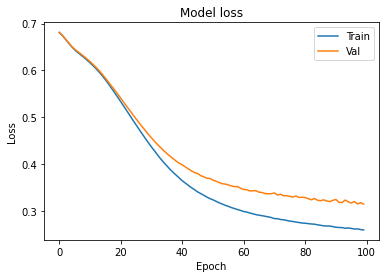

In [21]:
plt.plot(hist.history['loss']) #training loss and validation loss
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


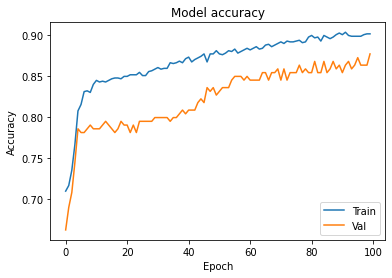

In [29]:
plt.plot(hist.history['accuracy']) #training accuracy and validation accuracy
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

adding regularization 

In [23]:
model_2 = Sequential([ #network that overfits the training set
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [24]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 50ms/step - loss: 0.5554 - accuracy: 0.6930 - val_loss: 0.3918 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3435 - accuracy: 0.8540 - val_loss: 0.3632 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3254 - accuracy: 0.8635 - val_loss: 0.3614 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2740 - accuracy: 0.8857 - val_loss: 0.3357 - val_accuracy: 0.8584
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2298 - accuracy: 0.9148 - val_loss: 0.4110 - val_accuracy: 0.8356
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2578 - accuracy: 0.8864 - val_loss: 0.3557 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2632 - accuracy: 0.8942 - val_loss: 0.3262 - val_accuracy: 0.8904
Epoch 

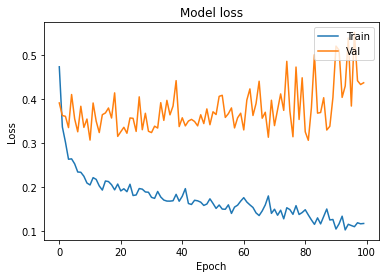

In [26]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

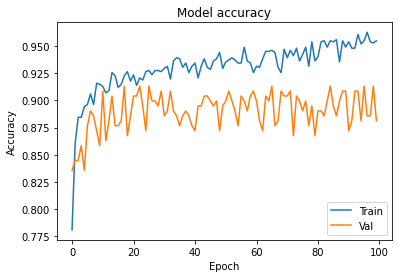

In [28]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [31]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 65ms/step - loss: 21.1002 - accuracy: 0.5391 - val_loss: 3.8972 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 2s 52ms/step - loss: 2.4809 - accuracy: 0.8327 - val_loss: 0.6912 - val_accuracy: 0.8402
Epoch 3/100
32/32 [==============================] - 2s 53ms/step - loss: 0.5832 - accuracy: 0.8670 - val_loss: 0.5503 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4841 - accuracy: 0.9038 - val_loss: 0.5166 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4866 - accuracy: 0.8804 - val_loss: 0.4946 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 2s 53ms/step - loss: 0.4378 - accuracy: 0.9056 - val_loss: 0.5504 - val_accuracy: 0.8219
Epoch 7/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4931 - accuracy: 0.8720 - val_loss: 0.4769 - val_accuracy: 0.8721
Epoch

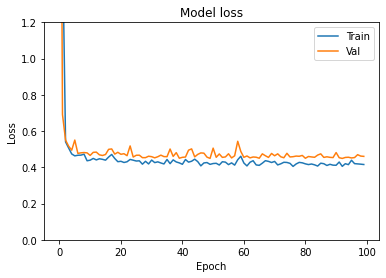

In [34]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

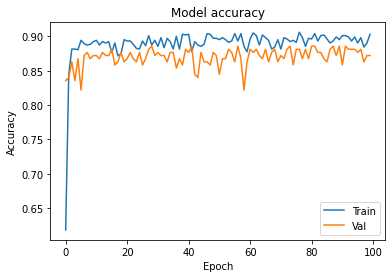

In [35]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()